# Should your fund invest in Bitcoin?

## 📖 Background
You work as an analyst at an investment fund in New York. Your CFO wants to explore if it is a good idea to invest some of the fund's assets in Bitcoin. You have to prepare a report on this asset and how it compares to the stock market in general.

## 🦮 Guiding Questions 
Create a report that covers the following:

1. How does the performance of Bitcoin compare to the S&P 500 and the price of gold?
2. Analyze Bitcoin's returns and volatility profile. Do you believe it could help improve the performance of a portfolio? Do you believe Bitcoin could be used as a hedge versus inflation?
3. Explore building a portfolio using some or all of these assets. Make a recommendation that minimizes overall risk and volatility.

#### 💾 The data

* Bitcoin daily data in US dollars
    - "date" - date from September 17, 2014 to November 17, 2021
    - "open" - the price at the beginning of the trading day
    - "high" - the highest price reached that day
    - "low" - the lowest price reached that day
    - "close" - the price at the closing of the trading day
    - "volume" - how many Bitcoin were traded that day

* S&P 500 daily data
    - "date" - date from September 17, 2014 to November 17, 2021
    - "open" - the index level at the beginning of the trading day
    - "high" - the highest level reached that day
    - "low" - the lowest level reached that day
    - "close" - the level at the closing of the trading day
    - "volume" - how many shares in the companies that make up the index were traded that day

* inflation and gold as monthly data
    - "date" - date from September, 2014 to November, 2021
    - "gold_usd" - price in usd of gold for that month
    - "cpi_us" - the inflation index for the US for that month (cpi = consumer price index)

_CPI data from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/cpi/). Publicly available information_.

In [1]:
# Import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

|Dataset			 	 | 		Filepaths	 	 |
|:-----------------------|:---------------------:|
| *bitcoin* |"./data/bitcoin-usd.csv"|
| *sp500*|"./data/sp500.csv"|
| *gold & inflation*|"./data/monthly_data.csv"|

In [2]:
# load dataframe from csv file

bitcoin_df = pd.read_csv("./data/bitcoin-usd.csv", parse_dates = ['date'])
sp500_df = pd.read_csv("./data/sp500.csv", parse_dates = ['date'])
gold_df = pd.read_csv("./data/monthly_data.csv", parse_dates = ['date'])

dfs = {'BITCOIN': bitcoin_df, 'S&P500': sp500_df, 'GOLD-CPI': gold_df}

In [3]:
for name, df in dfs.items():
    print(f"{name}\n{df.head()}\n")

BITCOIN
        date        open        high         low       close      volume
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800.0
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200.0
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700.0
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600.0
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100.0

S&P500
        date         open         high          low        close      volume
0 2014-09-17  1999.300049  2010.739990  1993.290039  2001.569946  3209420000
1 2014-09-18  2003.069946  2012.339966  2003.069946  2011.359985  3235340000
2 2014-09-19  2012.739990  2019.260010  2006.589966  2010.400024  4880220000
3 2014-09-22  2009.079956  2009.079956  1991.010010  1994.290039  3349670000
4 2014-09-23  1992.780029  1995.410034  1982.770020  1982.770020  3279350000

GOLD-CPI
        date  gold_usd   cpi_us
0 2014-09-01  1241.330  237.852
1 2014-10-

* _Source of inspiration for Analysis - [DataCamp tutorial, Python For Finance : Algorithmic Trading](https://www.datacamp.com/community/tutorials/finance-python-trading)_

## Data check and broadcast value

In [4]:
# check and set index type

def index_check (df):
    """
    check and set index type from Other to 'DateTimeIndex'
    
    Args:
    df - dataframe to be checked for index type
    
    Returns:
    df - dataframe set with 'date' column as index
    """
    
    index_type = df.index
    
    # verify and set index
    if (index_type == range(0, len(df))).all() == 1:
        df.set_index('date', inplace=True)
        return df
    else:
        return df
    

# Check dataframe information
for name, df in dfs.items():
    df = index_check(df)
    print(f"{name}\n")
    display(df.head())

BITCOIN



,open,high,low,close,volume
date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


S&P500



,open,high,low,close,volume
date,,,,,
2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000


GOLD-CPI



,gold_usd,cpi_us
date,,
2014-09-01,1241.330,237.852
2014-10-01,1223.565,238.031
2014-11-01,1176.413,237.433
2014-12-01,1200.440,236.151
2015-01-01,1249.333,234.812


In [5]:
# function to broadcast difference (open-close) and average (high-low) values

def abs_measures(df):
    """
    to broadcast difference (open-close) and average (high-low) values
    
    Args:
    df - dataframe to be added with broadcast values
    
    Returns:
    new_df - dataframe with diff and avg columns
    """
    new_df = df.copy()
    cols = df.columns.to_list()
    
    # try, except blocks to escape AttributeError, since gold_df lacks open, close, high, low   
    try:
        # to identify day-loss
        new_df['Diff (open,close)'] = df.open - df.close

        # to identify average-day-price
        new_df['Avg (high,low)'] = (df.high + df.low)/2
        return new_df
    #else:
    except AttributeError:
        print("\n\n!! Columns required for Difference and Mean do not exist !!\n")
        return df


# Iterate dataframes to broadcast absolute values (Difference and Mean for daily price), if applicable
for name, df in dfs.items():
    new_df = abs_measures(df)
    print(f"{name}\n")
    display(new_df.head())


BITCOIN



,open,high,low,close,volume,"Diff (open,close)","Avg (high,low)"
date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,8.529999,460.298004
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,32.419983,434.981994
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,29.307007,406.183502
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,-14.230988,406.589493
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,9.263977,402.803497


S&P500



,open,high,low,close,volume,"Diff (open,close)","Avg (high,low)"
date,,,,,,,
2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000,-2.269897,2002.015015
2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000,-8.290039,2007.704956
2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000,2.339966,2012.924988
2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000,14.789917,2000.044983
2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000,10.010010,1989.090027




!! Columns required for Difference and Mean do not exist !!

GOLD-CPI



,gold_usd,cpi_us
date,,
2014-09-01,1241.330,237.852
2014-10-01,1223.565,238.031
2014-11-01,1176.413,237.433
2014-12-01,1200.440,236.151
2015-01-01,1249.333,234.812


## Financial Risk Analysis
To identify the possible risks from Bitcoin inclusion in the Fund we calculate:
- [**Returns**](###-Returns) 
- [**Moving Window Averages**](###-Moving-Window-Averages) 
- [**Asset Volatility**](###-Asset-Volatility)
- [**Regression (Ordinary Least-Squares) between Asset Classes**](###-regression-ordinary-least-squares-between-asset-classes)
-----
-----

In [6]:
# Import neccessary visualization libraries
# Possible palette values include:
    #Name of a seaborn palette (deep, muted, bright, pastel, dark, colorblind)
    #Name of matplotlib colormap

import seaborn as sns
sns.set_context('talk')
sns.set_palette('bright', n_colors=5)
sns.set(rc={'figure.figsize':(12,5)})

### [Returns](#-Common-Financial-Analysis)
- **to represent change in value within a single day of trading**
- **_R<sub>t</sub> = (P<sub>t</sub>/P<sub>t-1</sub>)-1_** <br>
    - where **R** is Return in form of _log(pct_change())_, **P** is Price & **t** is time period (daily/monthly/quarterly)

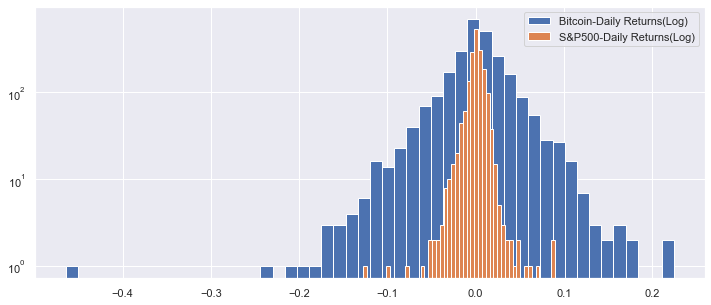

In [9]:
# daily log returns
bitcoin_log_return = np.log(bitcoin_df.close.pct_change()+1)
sp500_log_return = np.log(sp500_df.close.pct_change()+1)

fig, ax = plt.subplots()
ax = bitcoin_log_return.hist(bins=50, log=True, label='Bitcoin-Daily Returns(Log)', figsize=(12,5))
ax = sp500_log_return.hist(bins=50, log=True, label='S&P500-Daily Returns(Log)', figsize=(12,5))

plt.legend(loc='best')
plt.show()

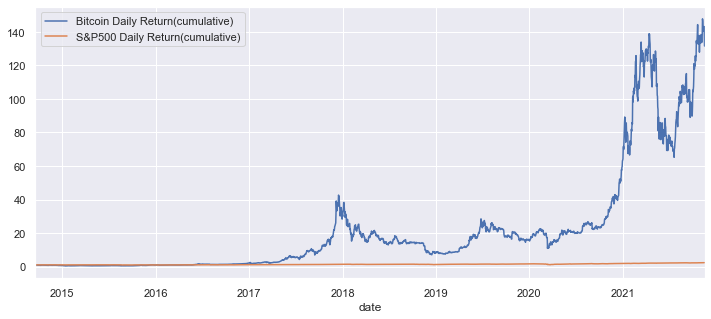

In [10]:
# BITCOIN & SP500 - cumulative daily returns
cum_bitcoin_return = (bitcoin_df.close.pct_change()+1).cumprod()
cum_sp500_return = (sp500_df.close.pct_change()+1).cumprod()

fig, ax = plt.subplots()
ax = cum_bitcoin_return.plot(figsize=(12,5), label='Bitcoin Daily Return(cumulative)')
ax = cum_sp500_return.plot(figsize=(12,5), label='S&P500 Daily Return(cumulative)')

plt.legend(loc='best')
plt.show()

* The calculated returns over monthly/quarterly/yearly will represent the same logarithmic graphs and cumulative graphs with smoother edges. The significant takeaway from these graphs is the exponential growth of Bitcoin compared to the linear growth of S&P500, as represented and identified through these visualizations.
* **Statistical proofs are yet to be calcualated for conclusive proof.**

In [11]:
# BITCOIN & S&P500 - Daily Returns
all_close = bitcoin_df[['close']].join(sp500_df.close, on=bitcoin_df.index, how='left', lsuffix='_bitcoin', rsuffix='_sp500') 
all_close

,close_bitcoin,close_sp500
date,,
2014-09-17,457.334015,2001.569946
2014-09-18,424.440002,2011.359985
2014-09-19,394.795990,2010.400024
2014-09-20,408.903992,NaN
2014-09-21,398.821014,NaN
...,...,...
2021-11-13,64469.527344,NaN
2021-11-14,65466.839844,NaN
2021-11-15,63557.871094,4682.799805


array([[<AxesSubplot:xlabel='close_bitcoin', ylabel='close_bitcoin'>,
        <AxesSubplot:xlabel='close_sp500', ylabel='close_bitcoin'>],
       [<AxesSubplot:xlabel='close_bitcoin', ylabel='close_sp500'>,
        <AxesSubplot:xlabel='close_sp500', ylabel='close_sp500'>]],
      dtype=object)

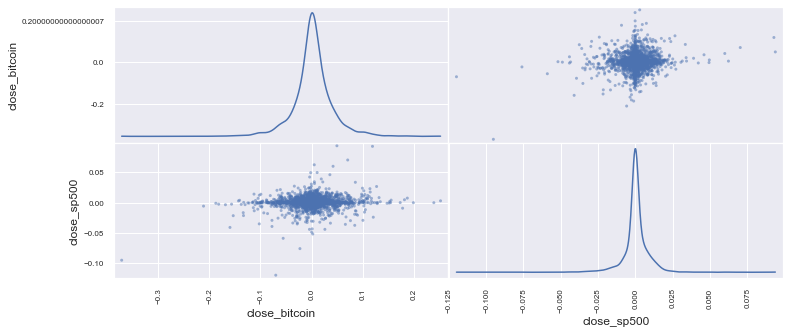

In [12]:
# Calculate pct_change on combined dataset
all_pct_change = all_close.pct_change()
pd.plotting.scatter_matrix(all_pct_change, diagonal='kde', figsize=(12,5)) # similar to --sns.pairplot(all_pct_change, kind='kde')

### [Moving Window Averages](#-Common-Financial-Analysis)
- **to calculate a statistic for a specific timeframe continuously throughout the dataset**

<AxesSubplot:title={'center':'BITCOIN-Moving window average VS closing price'}, xlabel='Year', ylabel='Price in USD'>

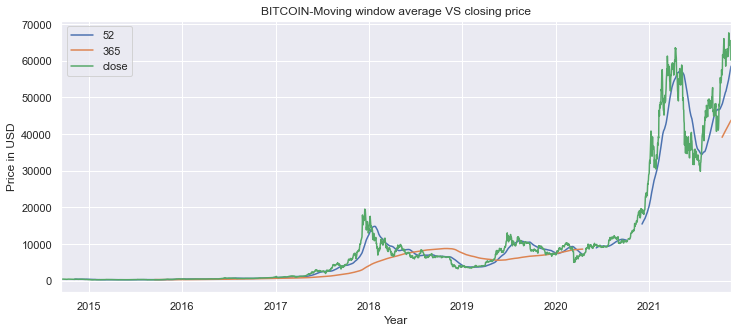

In [13]:
# pandas rolling function aggregated with mean 
bit = pd.DataFrame()
bit['52'] = bitcoin_df.close.rolling(window=52).mean()
bit['365'] = bitcoin_df.close.rolling(window=365).mean()
bit ['close'] = bitcoin_df.close

# plot different window sizes in comparison with total time
bit[['52', '365','close']].plot(figsize=(12,5), title='BITCOIN-Moving window average VS closing price',xlabel='Year', ylabel='Price in USD')


<AxesSubplot:title={'center':'S&P500-Moving window average VS closing price'}, xlabel='Year', ylabel='Price in USD'>

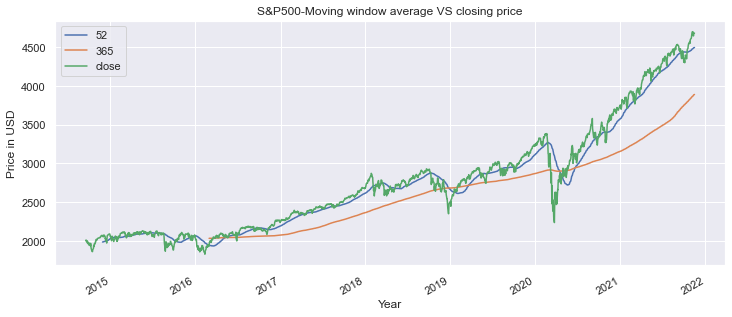

In [14]:
# pandas rolling function aggregated with mean 
bench = pd.DataFrame()
bench['52'] = sp500_df.close.rolling(window=52).mean()
bench['365'] = sp500_df.close.rolling(window=365).mean()
bench['close'] = sp500_df.close

# plot different window sizes in comparison with total time
bench[['52', '365','close']].plot(figsize=(12,5), title='S&P500-Moving window average VS closing price',xlabel='Year', ylabel='Price in USD')

<AxesSubplot:title={'center':'Gold price-Moving window average'}, xlabel='Year', ylabel='Price in USD'>

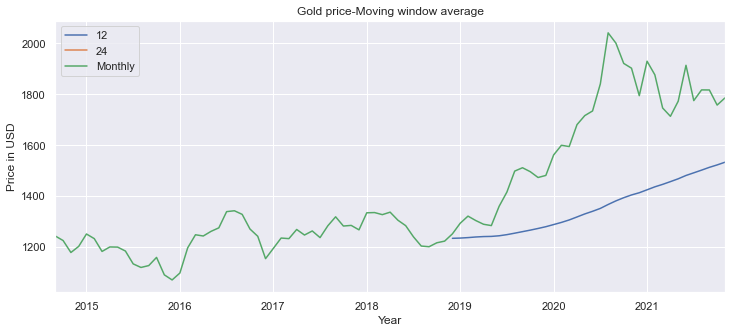

In [15]:
# pandas rolling function aggregated with mean 
bench = pd.DataFrame()
bench['12'] = gold_df.gold_usd.rolling(window=52).mean()
bench['24'] = gold_df.gold_usd.rolling(window=365).mean()
bench['Monthly'] = gold_df.gold_usd

# plot different window sizes in comparison with total time
bench[['12','24','Monthly']].plot(figsize=(12,5), title='Gold price-Moving window average',xlabel='Year', ylabel='Price in USD')

### [Asset Volatility](#-Common-Financial-Analysis)
* **change in variance in stock returns during a specified timeframe.**
    * This measure is mainly a comparison between two or more stocks to identify less risky investments
    * Greater change in variance --> Higher Volatility --> Risky Investment --> Choosing a less risky investment


* However, since the stock price data of gold & consumer price index(cpi), to understand inflation, are recorded on a monthly basis, where as S&P500 and Bitcoin are recorded daily.
* As a result, the volatility measurement through variance would not be an entirely significant measurement
* **Hence, the conclusion to visualize the data in two different ways :** 
    1. Scale price data of all sources and visualize the Assets against Inflation (cpi)
    2. Calculate & visualize asset volatility based on percent change of their monthly price (close) update 

#### 1. Scale price data of Assets and Inflation to visualize growth rate

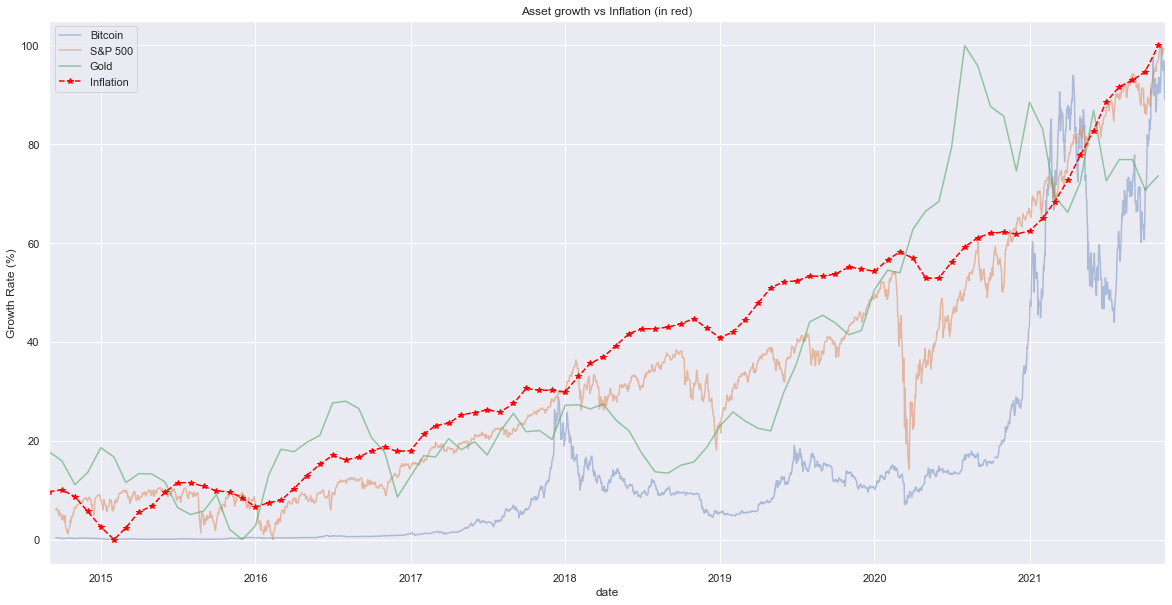

In [16]:
# Min-Max scaling over the entire dataframe using, z = df - df.min() / df.max()
def scale_df(df):
    """
    scales all values in the df based on minmumum & maximum values to align within a scale of 0 to 1

    Args:
    df - Dataframe to be scaled by minimum and maximum values

    Returns:
    scaled_df - Dataframe with scaled values in range of 0 to 1
    """
    new_df = df.copy()

    new_df -= new_df.min() #subtract with lowest value per column, to find the '0' value
    new_df /= new_df.max() #divide with highest value per column, to find the '1' value
    new_df = new_df*100 #values in percentage

    return new_df


# Call scale_df and plot scaled dataframes to visualize Assets against Inflation
fig, ax = plt.subplots(figsize=(20,10), sharex=True)
ax.set(xlabel='Year', ylabel='Growth Rate (%)')
plt.title("Asset growth vs Inflation (in red)")
ax = scale_df(bitcoin_df).close.plot(label='Bitcoin', alpha=0.4)
ax = scale_df(sp500_df).close.plot(label='S&P 500', alpha=0.5)
ax = scale_df(gold_df).gold_usd.plot(label='Gold', alpha=0.6)
ax = scale_df(gold_df).cpi_us.plot(label='Inflation', color='red', marker='*', linestyle='--')
plt.legend(loc='best')
plt.show()

#### 2. Calculate & visualize asset volatility based on percent change of their monthly price (close) update 

In [17]:
# scale dataframe and resample for median with monthly frequency
sp500_m = scale_df(sp500_df)
sp500_m = sp500_m.resample('M').median()
sp500_m.info()            

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87 entries, 2014-09-30 to 2021-11-30
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    87 non-null     float64
 1   high    87 non-null     float64
 2   low     87 non-null     float64
 3   close   87 non-null     float64
 4   volume  87 non-null     float64
dtypes: float64(5)
memory usage: 4.1 KB


In [18]:
# scale dataframe and resample for median with monthly frequency
bit_m = scale_df(bitcoin_df)
bit_m = bit_m.resample('M').median()
bit_m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87 entries, 2014-09-30 to 2021-11-30
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    87 non-null     float64
 1   high    87 non-null     float64
 2   low     87 non-null     float64
 3   close   87 non-null     float64
 4   volume  87 non-null     float64
dtypes: float64(5)
memory usage: 4.1 KB


In [19]:
# scale dataframe and resample for median with monthly frequency
gold_m = scale_df(gold_df)
gold_m = gold_m.resample('M').median()
gold_m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87 entries, 2014-09-30 to 2021-11-30
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gold_usd  87 non-null     float64
 1   cpi_us    87 non-null     float64
dtypes: float64(2)
memory usage: 2.0 KB


In [20]:
# concatenate monthly close prices of Gold, S&P500 & Bitcoin and Rename columns
monthly_close = pd.concat([sp500_m.close, gold_m.gold_usd, bit_m.close], axis=1)
monthly_close.columns = ['sp500', 'gold', 'bitcoin']
monthly_close

,sp500,gold,bitcoin
date,,,
2014-09-30,5.552076,17.774401,0.334159
2014-10-31,4.075724,15.949323,0.272240
2014-11-30,7.336159,11.105187,0.281842
2014-12-31,8.174072,13.573588,0.232189
2015-01-31,6.801632,18.596585,0.103495
...,...,...,...
2021-07-31,88.365319,72.580166,49.812340
2021-08-31,91.072434,76.915562,69.061219
2021-09-30,91.428724,76.884741,68.111137


<AxesSubplot:title={'center':'Asset Volaitlity in terms of Percent Change'}, xlabel='Year', ylabel='Monthly Percent Change(%)'>

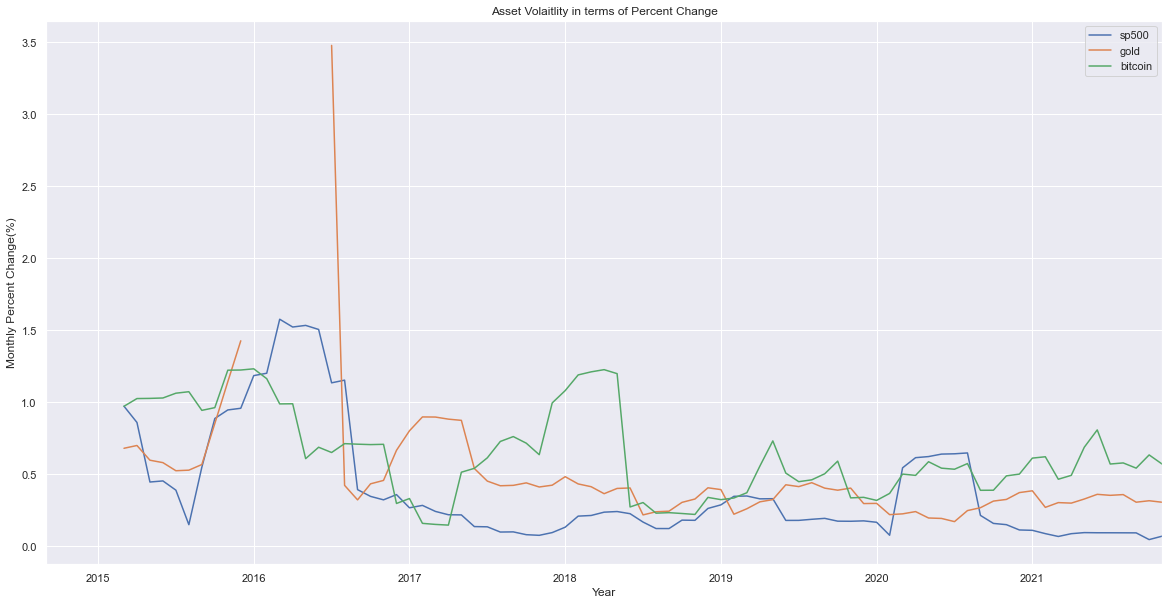

In [21]:
monthly_pct_change = monthly_close.pct_change() # monthly prices percent change to determine progression
window = 6 # window size, for rolling standard deviation and variance calculation

volatility = monthly_pct_change.rolling(window).std() * np.sqrt(window) # change in variance
volatility.plot(figsize=(20,10), xlabel='Year', ylabel='Monthly Percent Change(%)', title='Asset Volaitlity in terms of Percent Change')

In [22]:
gold_df.gold_usd.min() # gold price on 2015 December

1068.317

* Gold price was scaled using min-max scale, as a result, **the scaled-value for December 2015 was 0.000 since it was the lowest in the entire dataset (September 2014-November 2021)**
* **In addition to the window size (6) & the percent change**, missing graphical data is observed during the period December 2015-June 2016
* However, growth rate has recovered within the next month (see below), **January 2016**

In [23]:
monthly_close['2015-11':'2016-3']

,sp500,gold,bitcoin
date,,,
2015-11-30,8.911903,2.061984,0.235474
2015-12-31,7.842493,0.000000,0.378224
2016-01-31,2.709027,2.808555,0.344507
2016-02-29,3.047219,13.003720,0.340008
2016-03-31,6.809985,18.286224,0.353788


### [**Regression (Ordinary Least-Squares) between Asset Classes**](#-Common-Financial-Analysis)

In [24]:
# import library for OLS from statsmodel
import statsmodels.api as sm

In [25]:
# identify null values
all_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2619 entries, 2014-09-17 to 2021-11-17
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   close_bitcoin  2615 non-null   float64
 1   close_sp500    1805 non-null   float64
dtypes: float64(2)
memory usage: 125.9 KB


In [26]:
# drop null values
all_close.dropna(inplace=True)
all_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1801 entries, 2014-09-17 to 2021-11-15
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   close_bitcoin  1801 non-null   float64
 1   close_sp500    1801 non-null   float64
dtypes: float64(2)
memory usage: 42.2 KB


In [27]:
# calculate returns and drop null values
all_returns = np.log(all_close/all_close.shift(1))
all_returns.dropna(inplace=True)
all_returns.columns = ['returns_bitcoin','returns_sp500']
all_returns.head()

,returns_bitcoin,returns_sp500
date,,
2014-09-18,-0.074643,0.004879
2014-09-19,-0.072402,-0.000477
2014-09-22,0.018461,-0.008046
2014-09-23,0.080333,-0.005793
2014-09-24,-0.029306,0.007802


In [28]:
# denote S&P 500 closing data as independent variable
y = all_returns.returns_bitcoin
x = sm.add_constant(all_returns.returns_sp500)

In [29]:
# construct regression model(OLS) for Bitcoin closing data
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        returns_bitcoin   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     45.24
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           2.33e-11
Time:                        22:01:42   Log-Likelihood:                 2987.4
No. Observations:                1800   AIC:                            -5971.
Df Residuals:                    1798   BIC:                            -5960.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0024      0.001      2.242      0.025       0.000       0.005
returns_sp500     0.6478      0.096      6.726      0.000       0.459       0.837
==============================================================================
Omnibus:                      291.323   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3266.546
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       9.555   Cond. No.                         88.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0.5, 0, 'S&P 500 Returns'),
 Text(0, 0.5, 'Bitcoin Returns'),
 Text(0.5, 1.0, 'Returns analysis(OLS) of S&P500 in comparison with Bitcoin')]

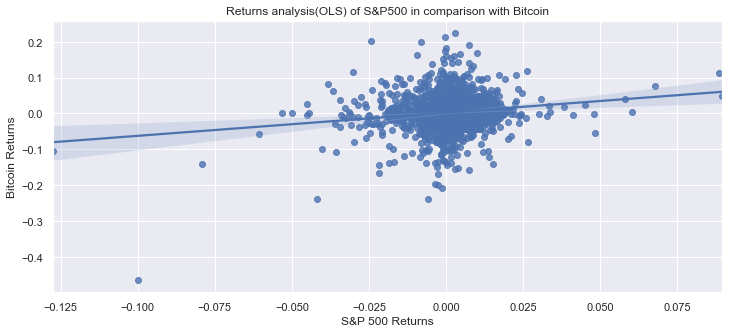

In [30]:
fig = sns.regplot(x='returns_sp500', y='returns_bitcoin', data=all_returns)

fig.set(xlabel='S&P 500 Returns', ylabel='Bitcoin Returns', title='Returns analysis(OLS) of S&P500 in comparison with Bitcoin')

* **The regression analysis between Bitcoin and S&P 500 Returns conclude that there is a positive correlation between them and hence could be used in the same portfolio to reduce risk and volatility**

<AxesSubplot:xlabel='date'>

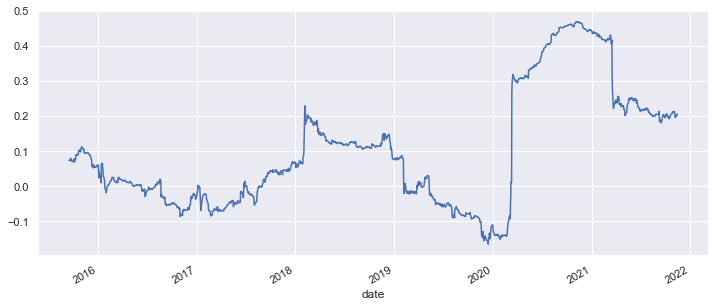

In [31]:
all_returns.returns_sp500.rolling(window=252).corr(all_returns.returns_bitcoin).plot()

* **The correlation plot between S&P500 and Bitcoin Returns when plotted individually also determines a similar trend, as represented above.**

### Multiple Regression Analysis to determine relationship between Assets and Inflation (cpi_us)
* Inflation - Dependent variable
* S&P500, Gold & Bitcoin - Independent variables

_(using **monthly_close** dataframe created for Asset Volatility calculation)_

#### Multiple Regression using all the Assets (Gold, S&P 500, Bitcoin) as the Independent variables

In [32]:
# inflation as dependent variable
y = gold_m.cpi_us 

# assets-S&P500, Gold & Bitcoin as independent variables
x1 = monthly_close

# build multiple linear regression model and fit data
x = sm.add_constant(x1)
mlr_model = sm.OLS(y, x).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cpi_us   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     487.3
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           1.44e-52
Time:                        22:01:43   Log-Likelihood:                -275.91
No. Observations:                  87   AIC:                             559.8
Df Residuals:                      83   BIC:                             569.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9743      1.295      1.524      0.131      -0.602       4.551
sp500          1.2471      0.080     15.518      0.000       1.087       1.407
gold          -0.0079      0.047     -0.168      0.867      -0.101       0.086
bitcoin       -0.3231      0.065     -4.985      0.000      -0.452      -0.194
==============================================================================
Omnibus:                       30.230   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.498
Skew:                           1.164   Prob(JB):                     1.48e-17
Kurtosis:                       6.995   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* From the OLS model summary we see that - 
    * **Adj R-squared and R-squared values** are very significant and similar **(~0.945)** showing **strong correlation between Inflation and all the Assets,** _as visualized from Asset Volatility section_
    * **Coeffecient value of sp500 (1.2471)** signifies strong positive correlation with Inflation, i.e., **rise in Inflation leads to rise in S&P 500 stock prices**
    * **Coeffecient value of gold (-0.0079) and bitcoin (-0.3231)** signify weak and moderate negative correlation with Inflation, respectively, i.e., **rise in Inflation leads to fall in Gold prices (weakly) and Bitcoin prices (moderately)**   


#### Multiple Regression using only S&P 500 and Bitcoin as the Independent variables

In [33]:
# inflation as dependent variable
y = gold_m.cpi_us 

# assets-S&P500, Gold & Bitcoin as independent variables
x1 = monthly_close[['sp500','bitcoin']]

# build multiple linear regression model and fit data
x = sm.add_constant(x1)
mlr_model = sm.OLS(y, x).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cpi_us   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     739.4
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           4.73e-54
Time:                        22:01:43   Log-Likelihood:                -275.93
No. Observations:                  87   AIC:                             557.9
Df Residuals:                      84   BIC:                             565.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9672      1.287      1.528      0.130      -0.592       4.527
sp500          1.2378      0.058     21.360      0.000       1.123       1.353
bitcoin       -0.3206      0.063     -5.119      0.000      -0.445      -0.196
==============================================================================
Omnibus:                       29.042   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.846
Skew:                           1.130   Prob(JB):                     2.51e-16
Kurtosis:                       6.836   Cond. No.                         98.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* From the OLS model summary, using only S&P 500 and Bitcoin as the Independent variables, we see that - 
    * **Adj R-squared and R-squared values** are very significant and similar **(~0.945)** showing **strong correlation between Inflation and the Assets,** _as visualized from Asset Volatility section_
    * **Coeffecient value of sp500 (1.2378)**, comparitively reduced bias, signifies strong positive correlation with Inflation, i.e., **rise in Inflation leads to rise in S&P 500 stock prices**
    * **Coeffecient value of bitcoin (-0.3206)** signifies moderate negative correlation with Inflation, respectively, i.e., **rise in Inflation leads to fall in Bitcoin prices (moderately)**   
------
------

# Conclusion

* From the understanding of the Returns evaluation, Moving Window Averages, Asset Volatility calculations and Regression Analysis, the [Guiding Questions](##-guiding-questions)🦮 can thus be answered as follows :
1. How does the performance of Bitcoin compare to the S&P 500 and the price of gold?
    * Performance of Bitcoin compared to Gold and S&P 500 is exponential and continuously progressive after every year. It has also been proven by regression analysis and visualizations that Bitcoin has been on an extensive growth profile since 2014-2021.


2. Do you believe Bitcoin's returns and volatility profile could help improve the performance of a portfolio? Do you believe Bitcoin could be used as a hedge versus inflation?
    * Based on the Returns evaluation, Asset Volatility and Multiple regression analysis it could be conclusively stated that Bitcoin has had progressive and exponential (at times) growth during the period 2014-2021.
    * From the Returns evaluation, it could be stated that Bitcoin has shown a growth profile similar or better (at times) compared to S&P 500.
    * From Asset Volatility, it could be deduced that price changes are not unpredicatable and is rather stable compared to Gold.
    * From Multiple Regression analysis, the above claims have been statistically proven as defined above by the coeffecient values and R-squared values.
    * Henceforth, it would be a legitimate bet to prefer using Bitcoin as a hedge against inflation


3. Explore building a portfolio using some or all of these assets. Make a recommendation that minimizes overall risk and volatility.
    * Based on the Regression Analysis, the risk and volatility could only be lowered if Bitcoin, with S&P 500 and with or without Gold, is added to the fund portfolio. The presence of all the assets would provide a balanced protfolio. However, having Gold in the portfolio would be a justified gamble with Bitcoin against Inflation.
